## Akande Adeola Anduljelil Submission

In [1]:
import pandas as pd 
import numpy as np 
import pandas_profiling
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
fuel_df = pd.read_csv(r"C:\Users\Admin\Downloads\fuel_ferc1.csv")

In [20]:
fuel_df.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


#### Q1. 

In [4]:
A = [1,2,3,4,5,6]
B = [13, 21, 34]

In [5]:
A.extend(B)
A

[1, 2, 3, 4, 5, 6, 13, 21, 34]

#### Q2

In [6]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Q3

In [7]:
#fuel type with the lowest average fuel cost per unit burned = gas
fuel_df.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean().sort_values()

fuel_type_code_pudl
gas          13.659397
other        18.253856
waste        19.518122
coal         67.421830
oil         168.877086
nuclear    4955.157002
Name: fuel_cost_per_unit_burned, dtype: float64

#### Q4

In [8]:
#Standard deviation
fuel_df['fuel_mmbtu_per_unit'].std().round(2)

10.6

In [9]:
# 75th percentile
fuel_df['fuel_mmbtu_per_unit'].quantile(0.75).round(2)

17.01

#### Q5

In [10]:
#SKewness of fuel quantity burned in 2 decimal places
fuel_df['fuel_qty_burned'].skew().round(2)

15.85

In [11]:
#Kurtosis of fuel quantity burned in 2 decimal places
fuel_df['fuel_qty_burned'].kurtosis().round(2)

651.37

#### Q6 

In [12]:
#feature with missing value = 'fuel_Unit' with 180 missing values
fuel_df_missing = fuel_df.isnull().sum()
fuel_df_missing

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [13]:
# Percentage of the missing rows
sum((fuel_df_missing / len(fuel_df)).round(3))

0.006

#### Q7

In [14]:
# fill the missing values with the mode becuase there is a frequent value which is 'mcf'
fuel_df['fuel_unit'].fillna(fuel_df['fuel_unit'].mode()[0], inplace=True)

In [15]:
#confirm the filling of missing values
fuel_df_missing = fuel_df.isnull().sum()
fuel_df_missing

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

#### Q8

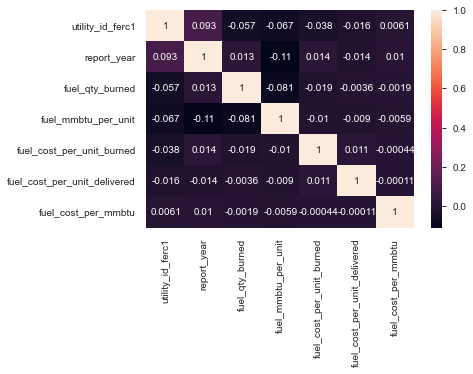

In [16]:
#correlation of features
sns.heatmap(fuel_df.corr(), annot=True)

#### Q9

In [17]:
# perentage change in fuel cost per unit burned of 'coal' in 1998 compared to 1995
fuel_df_coal = fuel_df[fuel_df['fuel_type_code_pudl'] == 'coal']

fuel_df_coal.groupby('report_year')['fuel_cost_per_unit_burned'].sum()

report_year
1994     14984.572
1995     14571.785
1996     12694.803
1997     43742.178
1998     11902.597
1999     16303.468
2000    100428.831
2001     15109.012
2002      9171.164
2003     30954.110
2004      9632.063
2005     11107.182
2006     12402.684
2007     12965.171
2008     14331.348
2009     45554.858
2010     88627.745
2011     17001.015
2012     17546.097
2013     17629.860
2014     15412.197
2015     13338.235
2016     11100.925
2017     10254.284
2018      9488.197
Name: fuel_cost_per_unit_burned, dtype: float64

In [18]:
perc_change = pd.Series([11902.597, 14984.572])

perc_change.pct_change()

0         NaN
1    0.258933
dtype: float64

#### Q10

In [19]:
# Year with the highest cost per unit delivered = 1997
fuel_df.groupby('report_year')['fuel_cost_per_unit_delivered'].mean().sort_values(ascending=False).head(5).to_frame()

,fuel_cost_per_unit_delivered
report_year,
1997,11140.197239
1996,9196.705948
2000,985.362877
2009,652.694163
2018,499.269966
